https://www.kaggle.com/datasets/sujithmandala/second-hand-car-price-prediction

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

file_path = 'cars.csv'

data = pd.read_csv(file_path)

data.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [71]:
data = data.drop(['Car_ID'], axis="columns")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              100 non-null    object
 1   Model              100 non-null    object
 2   Year               100 non-null    int64 
 3   Kilometers_Driven  100 non-null    int64 
 4   Fuel_Type          100 non-null    object
 5   Transmission       100 non-null    object
 6   Owner_Type         100 non-null    object
 7   Mileage            100 non-null    int64 
 8   Engine             100 non-null    int64 
 9   Power              100 non-null    int64 
 10  Seats              100 non-null    int64 
 11  Price              100 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 9.5+ KB


Zmienna objaśniana - Price.

Zbadamy teraz korelację każdej zmiennej na zmienną objaśnianą.

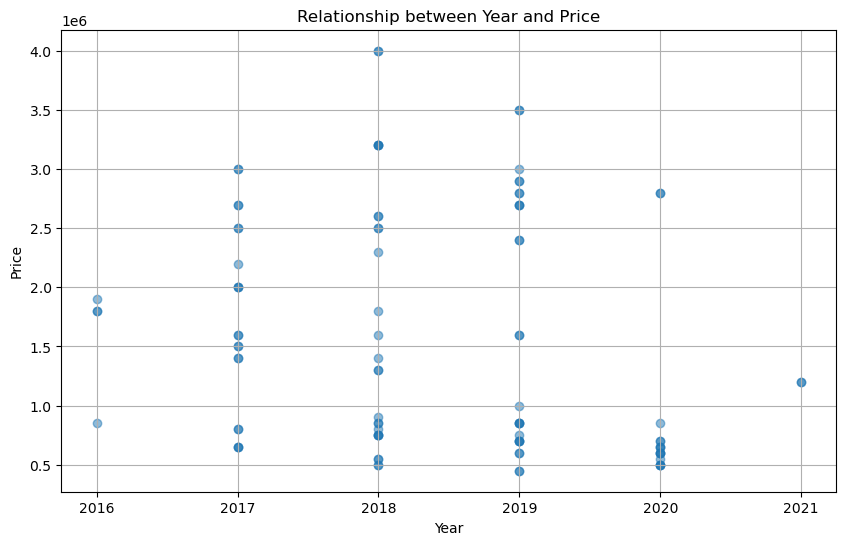

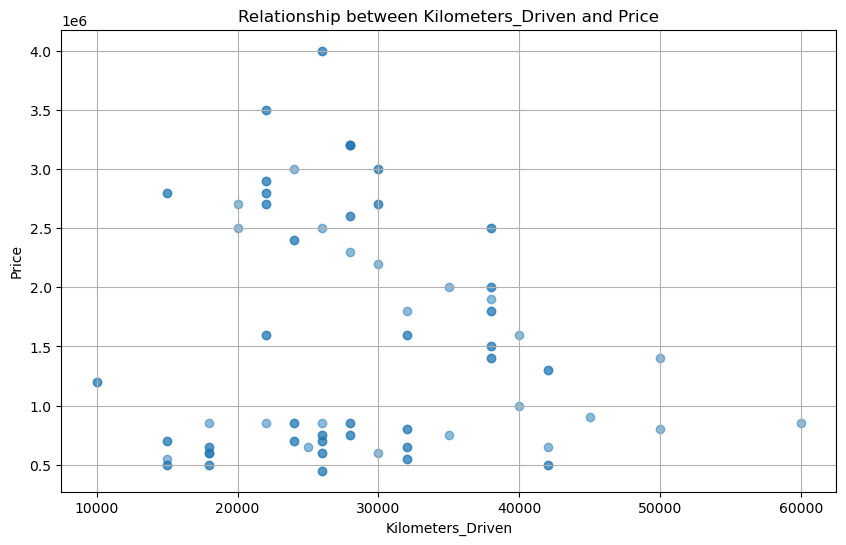

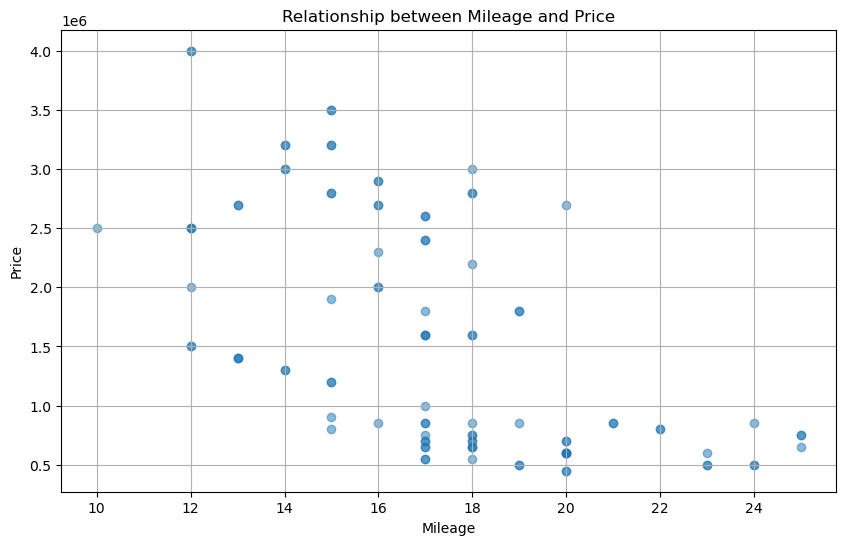

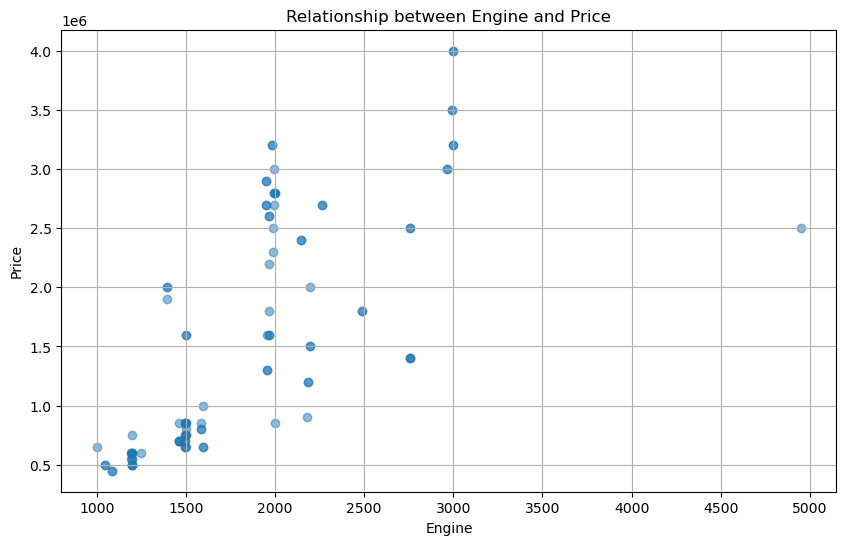

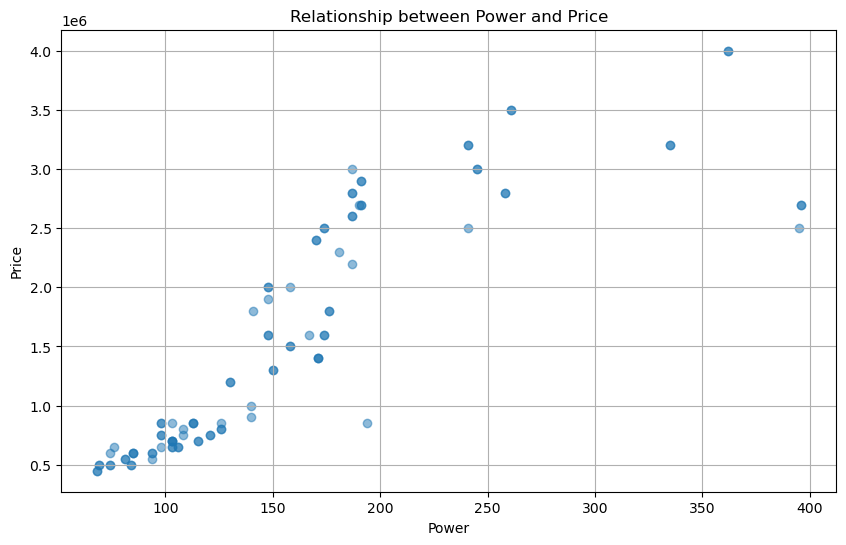

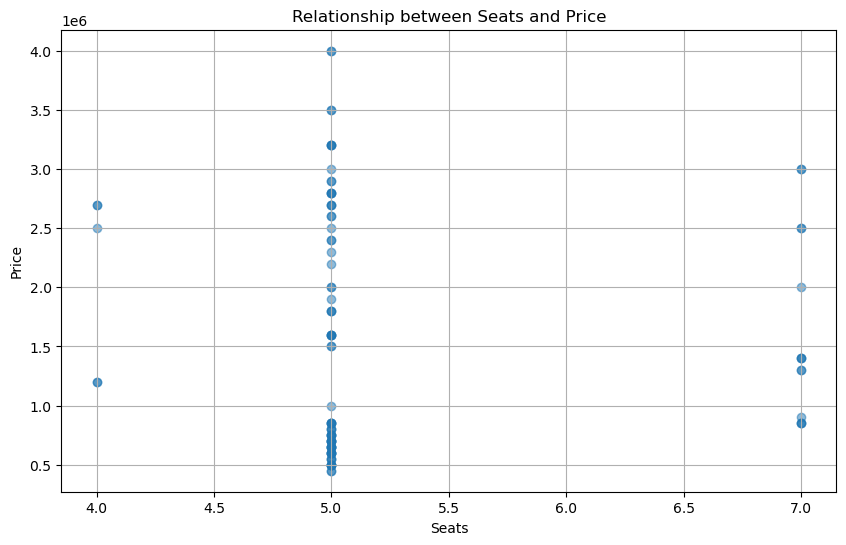

In [72]:
for column in data.columns:
    if column != 'Price' and data[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(10, 6))
        plt.scatter(data[column], data['Price'], alpha=0.5)
        plt.title(f"Relationship between {column} and Price")
        plt.xlabel(column)
        plt.ylabel("Price")
        plt.grid(True)
        plt.show()

Tendencja ujemna na wykresach z kilometrami i zużyciem paliwa.
Tendencja dodatnia na wykresach z pojemnością silnika i mocą.

Ponieważ regresja liniowa jest bardzo wrażliwa na odstające wartości usuniemy wiersze zawierające moc > 300km oraz pojemność > 3.0, zużycie > 22 oraz 20000 <= przebieg => 

In [73]:
data = data.loc[data['Power'] <= 300, :]
data = data.loc[data['Engine'] <= 3000, :]
data = data.loc[data['Mileage'] <= 20, :]
data = data.loc[data['Kilometers_Driven'] <= 50000, :]

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              79 non-null     object
 1   Model              79 non-null     object
 2   Year               79 non-null     int64 
 3   Kilometers_Driven  79 non-null     int64 
 4   Fuel_Type          79 non-null     object
 5   Transmission       79 non-null     object
 6   Owner_Type         79 non-null     object
 7   Mileage            79 non-null     int64 
 8   Engine             79 non-null     int64 
 9   Power              79 non-null     int64 
 10  Seats              79 non-null     int64 
 11  Price              79 non-null     int64 
dtypes: int64(7), object(5)
memory usage: 8.0+ KB


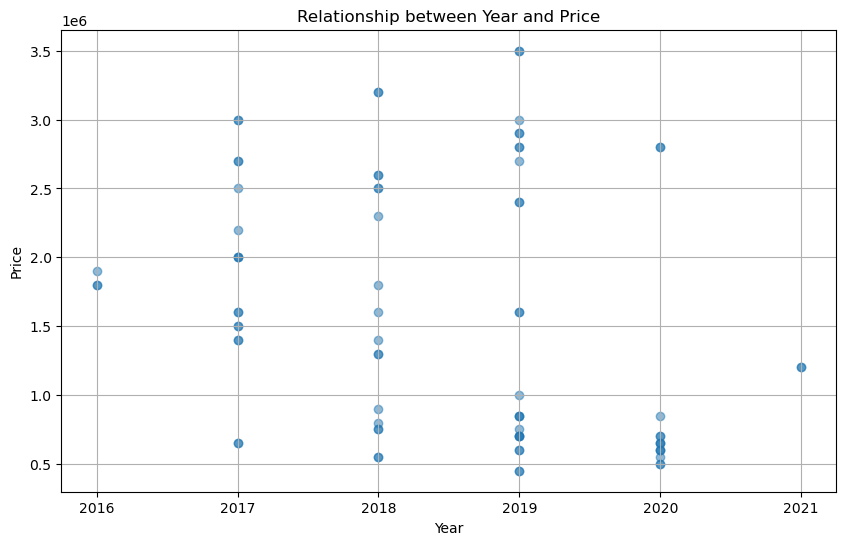

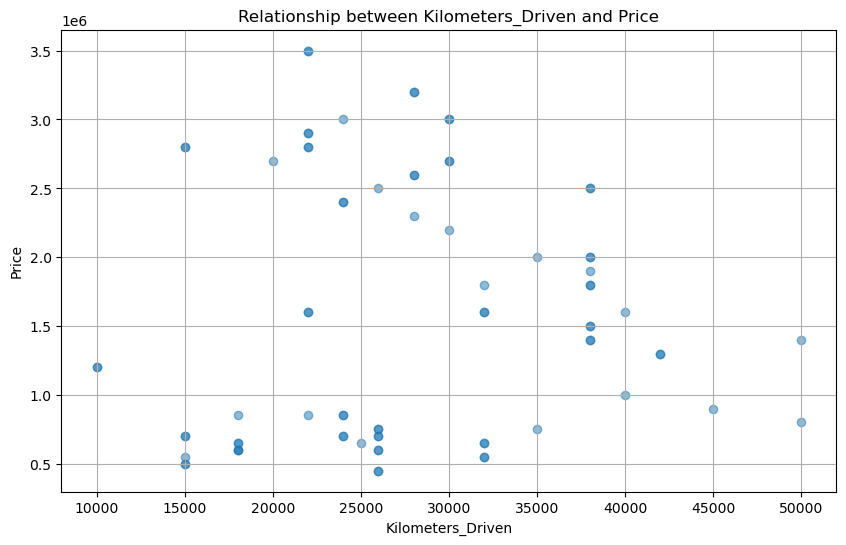

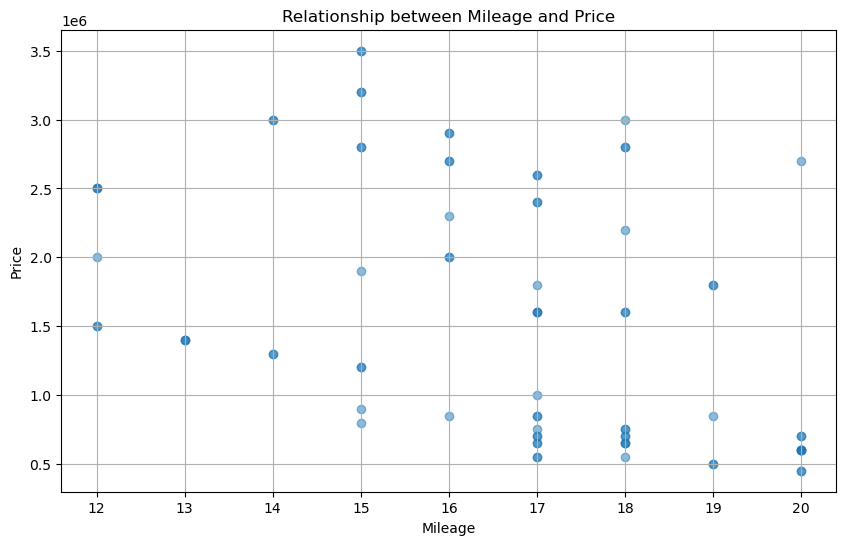

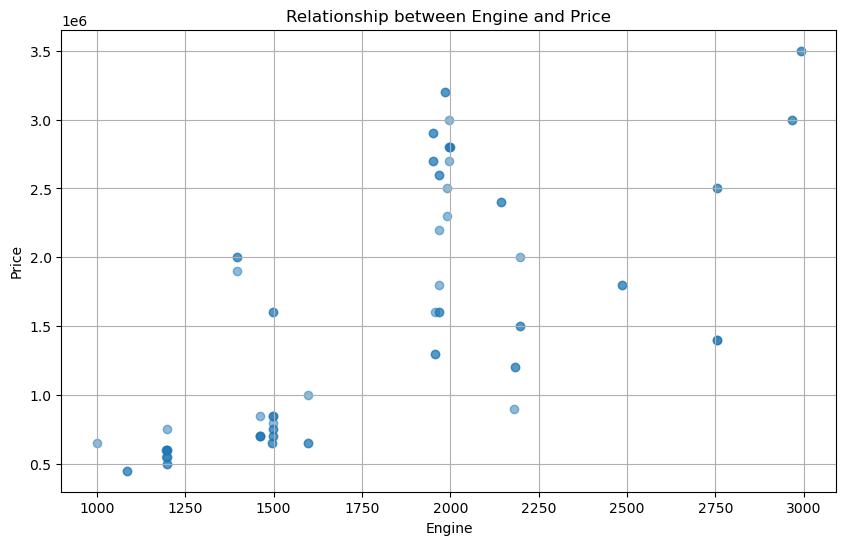

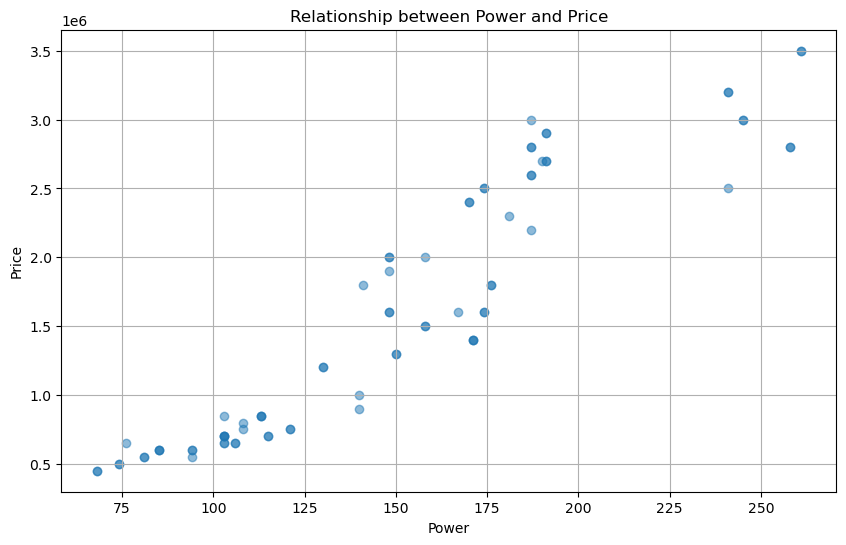

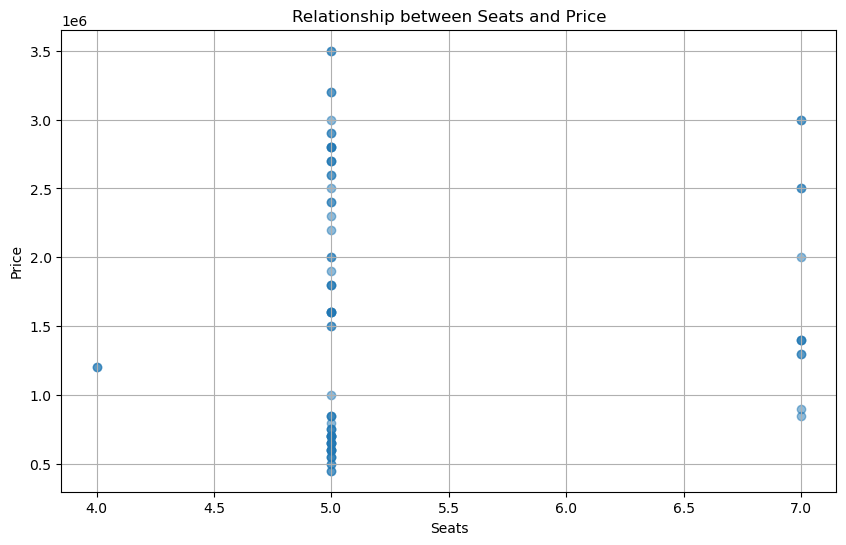

In [75]:
for column in data.columns:
    if column != 'Price' and data[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(10, 6))
        plt.scatter(data[column], data['Price'], alpha=0.5)
        plt.title(f"Relationship between {column} and Price")
        plt.xlabel(column)
        plt.ylabel("Price")
        plt.grid(True)
        plt.show()

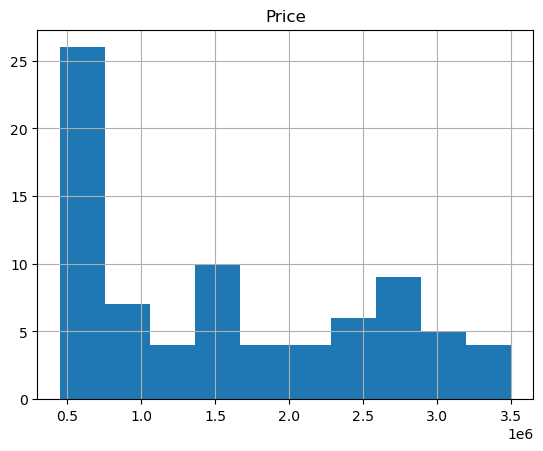

In [74]:
data["Price"].hist()
plt.title("Price")
plt.show()

In [82]:
pd.set_option('display.float_format', '{:,.2f}'.format)
data['Price'].describe()

count          79.00
mean    1,586,708.86
std       930,388.29
min       450,000.00
25%       700,000.00
50%     1,400,000.00
75%     2,500,000.00
max     3,500,000.00
Name: Price, dtype: float64

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error


target_column = 'Price'

data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.drop(columns=[target_column])
y = data_encoded[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Root Mean Squared Error (RMSE): 139739.26
R-squared (R^2): 0.97
Mean Absolute Percentage Error (MAPE): 3.43%


Po przeanalizowaniu wynyników można dojść do wniosku, że model nie pomylił się tak bardzo, ponieważ ~140 tys INR (Indian Rupees) nie jest wielkim odchyleniem od średniej wartości price (1,586,708.86).